# Image Augmentation

## Single image example

Using TensorFlow backend.


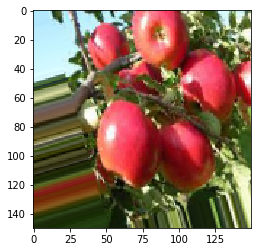

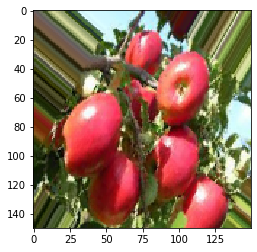

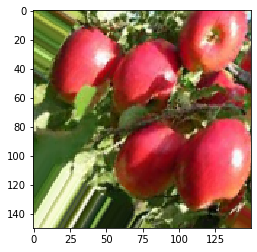

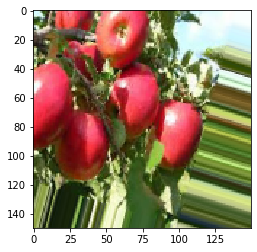

In [1]:
# From Oreilly book Deep Learning

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Image augmentation

import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image

img_path = 'images/apple_banana/train_dir/apple_003.jpg'

# Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))

# Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

## Train data generator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_dir = 'images/apple_banana/train_dir'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # Resizes all images to 150 × 150
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

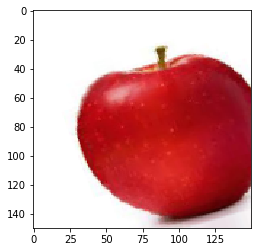

In [27]:
for i in train_generator:
    plt.imshow(i[0][0])
    break

## Test/Validation data generator

In [28]:
# You don't want to augment test data
test_datagen = ImageDataGenerator(rescale=1./255)

validation_dir = 'images/apple_banana/validation_dir'

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 28 images belonging to 2 classes.


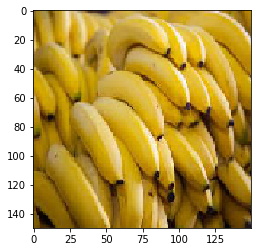

In [29]:
for i in validation_generator:
    plt.imshow(i[0][0])
    break

# CNN model on augmented data

In [30]:
from keras import optimizers, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

In [31]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1)

Epoch 1/5
100/100 [==============================] - 115s 1s/step - loss: 0.3040 - acc: 0.8693 - val_loss: 0.0920 - val_acc: 0.9643
Epoch 2/5
100/100 [==============================] - 107s 1s/step - loss: 0.1026 - acc: 0.9579 - val_loss: 0.0575 - val_acc: 1.0000
Epoch 3/5
100/100 [==============================] - 97s 967ms/step - loss: 0.0590 - acc: 0.9779 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 4/5
100/100 [==============================] - 100s 1s/step - loss: 0.0460 - acc: 0.9843 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 5/5
100/100 [==============================] - 101s 1s/step - loss: 0.0292 - acc: 0.9886 - val_loss: 0.0025 - val_acc: 1.0000


In [32]:
model.save('model_CNN_apple_banana.h5')

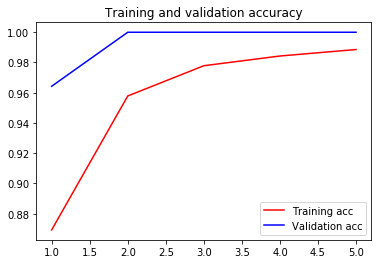

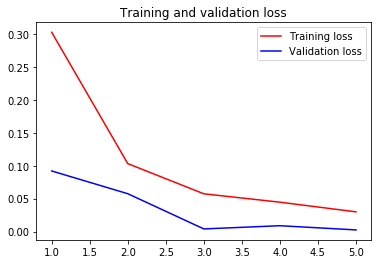

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()